<a href="https://colab.research.google.com/github/lexxai/goit_python_ds_hw_02/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Частина перша: Знайомство з Pandas



In [2]:
import pandas as pd

URL="https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
TABLE_NAME = "Коефіцієнт народжуваності в регіонах України"
data = pd.read_html(URL, match=TABLE_NAME)
if data:
  df= data[0]
assert df is not None, "DATA NOT READ FROM THE WIKI"

# Вивести перші рядки таблиці за допомогою методу head

In [3]:
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [4]:
print(df.shape)

(28, 9)


# Замініть у таблиці значення "—" на значення NaN

In [5]:
print(df.where(df=="—").head(5))

filtered_df = df[df.apply(lambda row: '—' in row.values, axis=1)]
print(filtered_df.head())

df=df.replace("—", "NaN")
print(df.head())


  Регіон  1950  1960  1970  1990  2000  2012 2014 2019
0    NaN   NaN   NaN   NaN   NaN   NaN   NaN    —    —
1    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN
2    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN
3    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN
4    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN    —
         Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0          Крим  230.0  206.0  160.0   130    73   126    —    —
4      Донецька  271.0  214.0  140.0   109    61    98   82    —
11    Луганська  262.0  235.0  144.0   116    62    96   51    —
26  Севастополь    NaN    NaN    NaN   125    70   120    —    —
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71


# Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [6]:
print(df[df.columns].dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [7]:
print(df[df.columns[1:]].dtypes)
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')
print()
print(df.dtypes)

1950    float64
1960    float64
1970    float64
1990      int64
2000      int64
2012      int64
2014     object
2019     object
dtype: object

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [8]:
df.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

# Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [9]:
print(df.tail())
print(df.shape)
df=df.iloc[:-1]
print(df.shape)
print(df.tail())

          Регіон   1950   1960   1970  1990  2000  2012   2014   2019
23   Чернівецька  247.0  218.0  170.0   148   101   128  129.0   92.0
24  Чернігівська  220.0  183.0  127.0   108    69    94   90.0   61.0
25          Київ    NaN  174.0  159.0   120    73   120  121.0  110.0
26   Севастополь    NaN    NaN    NaN   125    70   120    NaN    NaN
27       Україна  228.0  205.0  152.0   126    78   114  111.0   81.0
(28, 9)
(27, 9)
          Регіон   1950   1960   1970  1990  2000  2012   2014   2019
22     Черкаська  205.0  179.0  144.0   123    75   100   98.0   64.0
23   Чернівецька  247.0  218.0  170.0   148   101   128  129.0   92.0
24  Чернігівська  220.0  183.0  127.0   108    69    94   90.0   61.0
25          Київ    NaN  174.0  159.0   120    73   120  121.0  110.0
26   Севастополь    NaN    NaN    NaN   125    70   120    NaN    NaN


# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [10]:
df=df.fillna(df.mean(numeric_only=True))
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123,73,122,121.00,80.000000


# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [11]:
m = df.mean(numeric_only=True)
print(m)
print()
print(m.mean(numeric_only=True))

1950    231.040000
1960    207.576923
1970    156.000000
1990    130.592593
2000     82.222222
2012    116.555556
2014    111.440000
2019     80.173913
dtype: float64

139.45015081134648


In [12]:
m = df['2019'].mean()
m

80.17391304347828

In [13]:
df[ df['2019'] >= df['2019'].mean()][["Регіон", '2019']].sort_values(by='2019',ascending=False)

,Регіон,2019
25,Київ,110.0
16,Рівненська,107.0
6,Закарпатська,104.0
2,Волинська,101.0
23,Чернівецька,92.0
8,Івано-Франківська,88.0
14,Одеська,88.0
12,Львівська,87.0
20,Херсонська,81.0


# У якому регіоні була найвища народжуваність у 2014 році?

In [14]:
df['2014'].idxmax()

16

In [15]:
df.iloc[df['2014'].idxmax()][["Регіон"]]

Регіон    Рівненська
Name: 16, dtype: object

# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

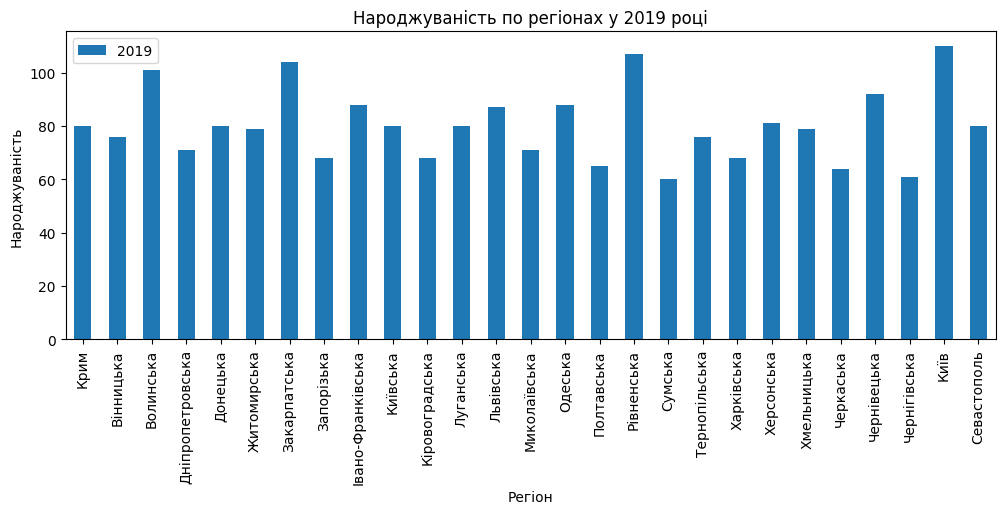

In [16]:
import matplotlib.pyplot as plt

pl = df[["Регіон",'2019']].plot(figsize=(12,4),kind="bar", x="Регіон", ylabel="Народжуваність", title="Народжуваність по регіонах у 2019 році")
plt.show()

# Візуалізація

## додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
#mport seaborn as sns

# sns.set_style("darkgrid")

In [18]:
df.head(2)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.0,192.0,142.0,124,84,112,109.00,76.000000


In [19]:
df.iloc[0]

Регіон         Крим
1950          230.0
1960          206.0
1970          160.0
1990            130
2000             73
2012            126
2014         111.44
2019      80.173913
Name: 0, dtype: object

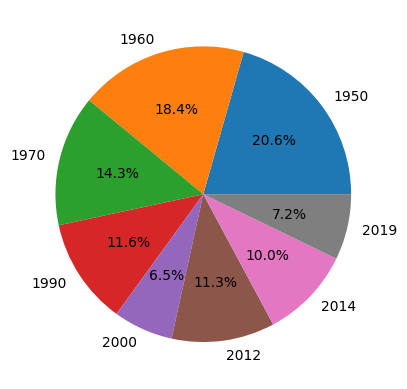

In [20]:
row = df.iloc[0]
plt.pie(row[1:], labels=df.columns[1:], autopct='%1.1f%%')
plt.show()

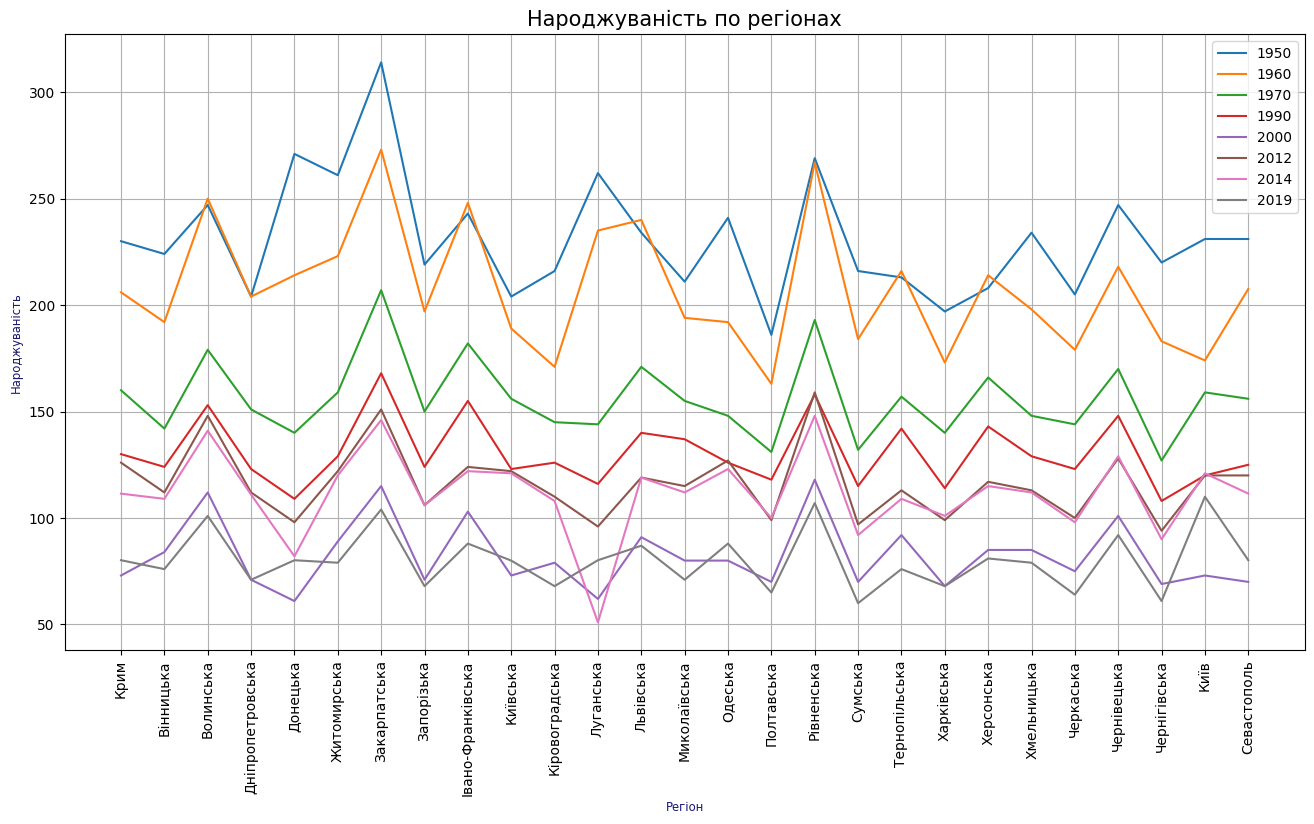

In [21]:
plt.figure(figsize=(16,8))


ax=plt.plot(df["Регіон"],df[df.columns[1:]], label=df.columns[1:])
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()

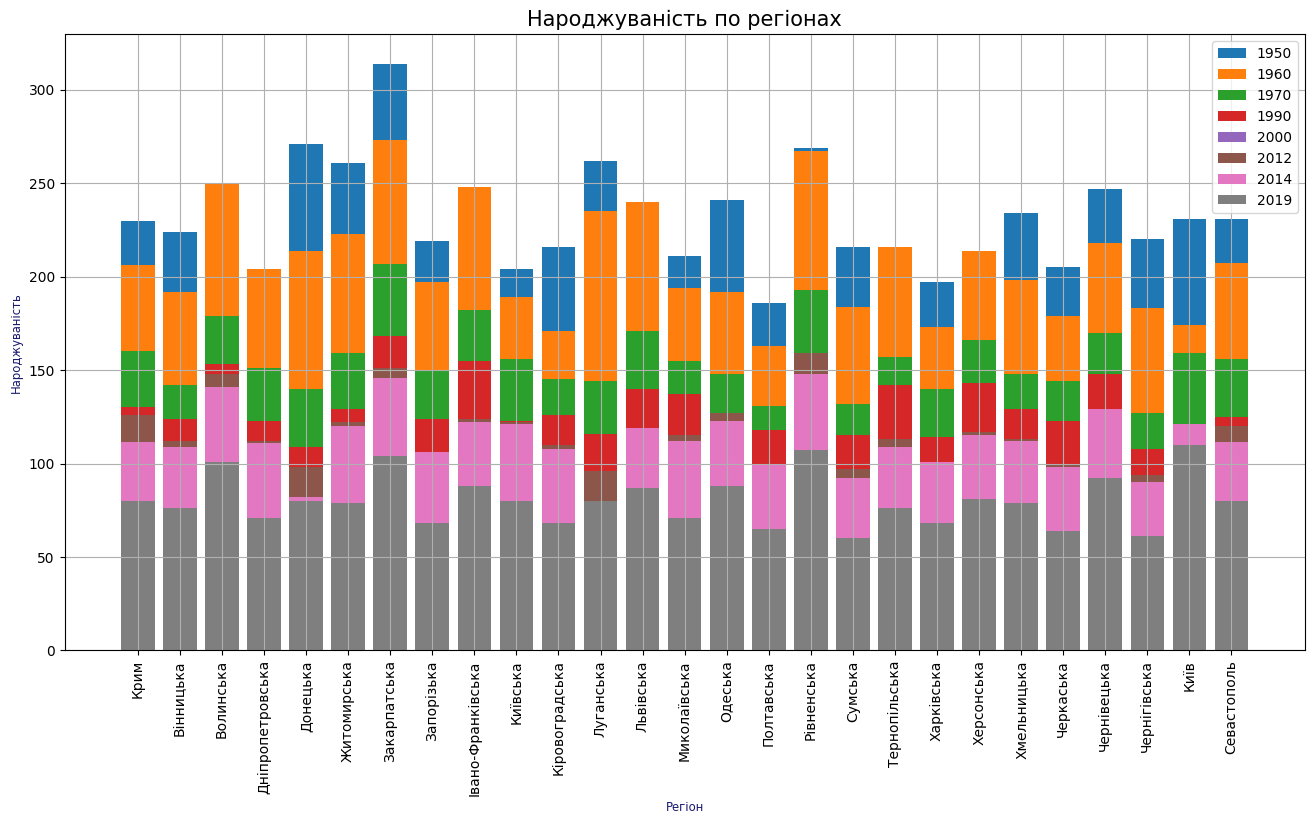

In [36]:
plt.figure(figsize=(16,8))

colnames = df.columns[1:]

for col in colnames:
  plt.bar(df["Регіон"],df[col],label=col)

plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()

[[0.12156863 0.46666667 0.70588235 1.        ]]
[[1.         0.49803922 0.05490196 1.        ]]
[[0.17254902 0.62745098 0.17254902 1.        ]]
[[0.83921569 0.15294118 0.15686275 1.        ]]
[[0.58039216 0.40392157 0.74117647 1.        ]]
[[0.54901961 0.3372549  0.29411765 1.        ]]
[[0.89019608 0.46666667 0.76078431 1.        ]]
[[0.49803922 0.49803922 0.49803922 1.        ]]


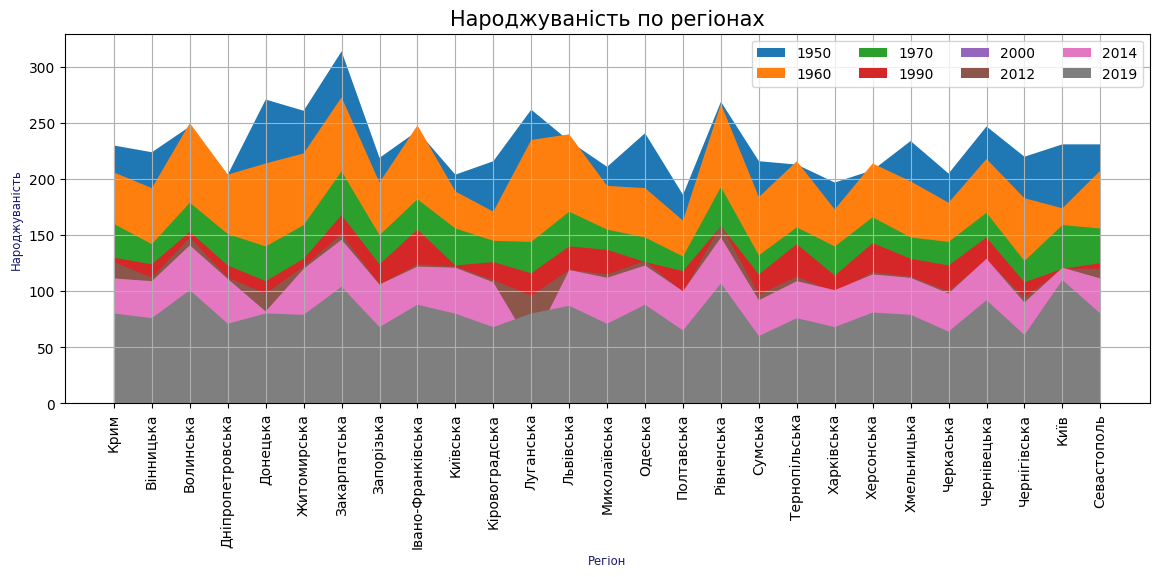

In [92]:
#plt.figure(figsize=(14,4))

colnames = df.columns[1:]

f, ax = plt.subplots()
f.set_figwidth(14)

for col in colnames:
  ax2 = ax.stackplot(df["Регіон"],df[col], labels=[col])
  color = ax2[0].get_facecolor()
  print(color)

plt.xticks(rotation=90)
plt.legend(loc='best', ncols=colnames.size/2)
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()